## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [146]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [147]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, FunctionTransformer

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

#Models Libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

#For model selection
from sklearn.model_selection import(
    StratifiedKFold,
    cross_val_score
)

#Over sampling and under sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [148]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Dataset

In [149]:
df = pd.read_csv('/content/drive/MyDrive/AIML_Great_Learning/03_Advanced_Machine_Learning/Project/EasyVisa.csv')

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [150]:
#Checking top 5 records
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [151]:
#Checking last 5 records
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [152]:
# Checking the number of rows and columns in the data
df.shape

(25480, 12)

The dataset has 25480 rows and 12 columns

In [153]:
#Check duplicate data
df.duplicated().sum()

np.int64(0)

In [154]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

,0
case_id,0.0
continent,0.0
education_of_employee,0.0
has_job_experience,0.0
requires_job_training,0.0
no_of_employees,0.0
yr_of_estab,0.0
region_of_employment,0.0
prevailing_wage,0.0
unit_of_wage,0.0


There is no missing value.

#### Check the data types of the columns for the dataset

In [155]:
#Check column data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


There are 9 object variables, 2 integer variables, and 1 float variable.


In [156]:
  #Check unique values in all columns
  df.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


##Data Preprocessing

In [157]:
#Keeping copy of dataset separately
data = df.copy()

In [158]:
#Checking missing value
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [159]:
#Unique values for each columns
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

case_id: ['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']
continent: ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
education_of_employee: ['High School' "Master's" "Bachelor's" 'Doctorate']
has_job_experience: ['N' 'Y']
requires_job_training: ['N' 'Y']
no_of_employees: [14513  2412 44444 ... 24335 48785 40224]
yr_of_estab: [2007 2002 2008 1897 2005 2012 1994 1924 1995 2004 1963 2006 1987 1991
 2001 1972 2013 1968 1884 1981 1997 2009 1998 1880 2000 2010 1965 1909
 2011 1989 1933 1960 2003 1976 1996 1847 1935 1890 1999 1838 1947 1939
 1970 1977 1982 1943 1956 1864 1974 1985 1984 1971 1913 1969 1818 1839
 1914 1988 1944 1855 1975 1966 1801 1920 1925 1993 1992 1979 1986 1931
 1962 1954 1868 1859 1946 1950 1869 1917 2014 1980 1896 1949 1843 1850
 1906 1961 1951 1958 1912 1983 1948 1945 1978 1898 1923 1911 1851 1865
 1849 1872 1967 1926 1873 1848 2015 1889 1876 1852 1938 1973 1959 1927
 1990 1930 1922 1940 1878 1934 1834 1928 1800 1861 1952 1846 188

In [160]:
#Check unique unique values for specific columns ['continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position','case_status']
for col in ['continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position','case_status']:
    print(f'{col}: {data[col].unique().tolist()}')

continent: ['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']
education_of_employee: ['High School', "Master's", "Bachelor's", 'Doctorate']
has_job_experience: ['N', 'Y']
requires_job_training: ['N', 'Y']
region_of_employment: ['West', 'Northeast', 'South', 'Midwest', 'Island']
unit_of_wage: ['Hour', 'Year', 'Week', 'Month']
full_time_position: ['Y', 'N']
case_status: ['Denied', 'Certified']


####These feature should be converted in Catagorical

####Mapping feature

In [161]:
#Convert columne in category datatype
for col in ['continent',
            'education_of_employee',
            'has_job_experience',
            'requires_job_training',
            'region_of_employment',
            'unit_of_wage',
            'full_time_position',
            'case_status']:
    data[col] = data[col].astype('category')

In [162]:
#remove case_id since this is just unique value
data.drop('case_id', axis=1, inplace=True)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [164]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


####Observations

**no_of_employees:** The number of employees varies significantly, with standard deviation (22877.93) compared to the mean (5667.04). The minimum value is -26, which indicates a data quality issue that needs to be addressed. There is a large maximum value (602069) whixh is outlire outliers.

**yr_of_estab:** The year of establishment ranges from 1800 to 2016. This indicates a wide range in the age of the companies. 3rd quartile shows that most of the companies stablished in 2005.

**prevailing_wage:** The prevailing wage has a large range, from a minimum of 2.14 to a maximum of 319210.27. The large difference between the 75th percentile (107735.51) and the maximum value also suggests the presence of outliers.

#### Fixing the negative values in number of employees columns

In [165]:
#Fix only negative values in no_of_employees columns
data['no_of_employees'] = data['no_of_employees'].abs()

In [166]:
#check if any -ve value exists in 'no_of_employees'
data['no_of_employees'].min()

11

#### Let's check the count of each unique category in each of the categorical variables

In [167]:
# Printing number of count of each unique value in each column
cat_col = data.select_dtypes("category").columns
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
--------------------------------------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
--------------------------------------------------
full_time_posit

### Univariate Analysis

In [168]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [169]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

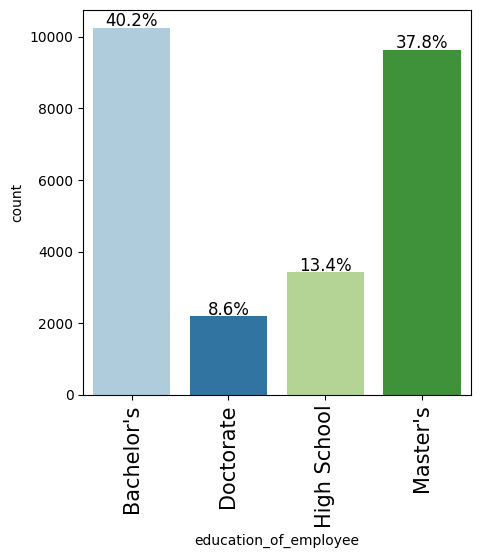

In [170]:
labeled_barplot(data, 'education_of_employee', perc=True)

The highest percentage of employees have a Bachelor's degree (40.1%).
Master's degrees are the second most common (37.8%).
High School and Doctorate degrees are less frequent, making up 13.4% and 8.6% respectively.
Majority of applicants have at least a Bachelor's degree.

#### Observations on region of employment

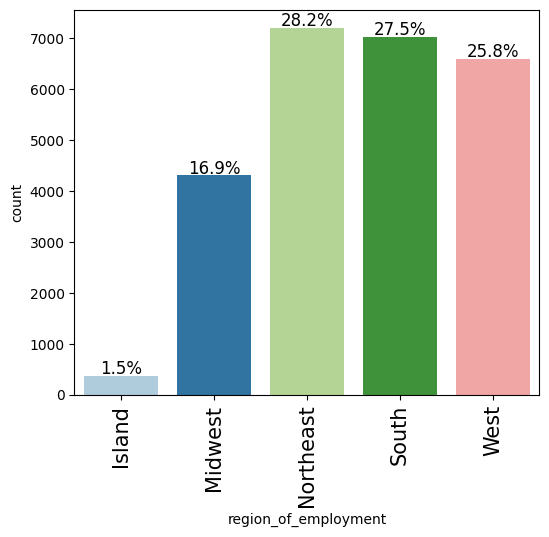

In [171]:
labeled_barplot(data, 'region_of_employment', perc=True)

The Northeast and South regions have the highest percentages of employment, both around 28%.
The West region is the next most common, with about 26% of the employment.
The Midwest region accounts for around 17% of the employment.
The Island region has a very small percentage of employment, less than 2%.

#### Observations on job experience

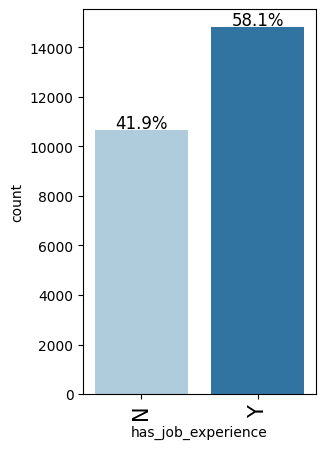

In [172]:
labeled_barplot(data, 'has_job_experience', perc=True)

A larger percentage of applicants do have job experience (58.1%).
where as 41.9% of applicants do not have job experience.
This indicates that having prior job experience is more common among the applicants in this dataset.

#### Observations on case status

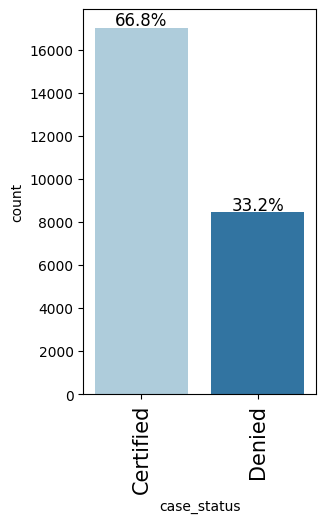

In [173]:
labeled_barplot(data, 'case_status', perc=True)

The majority of visa applications were Certified/Approved (66.8%).
A smaller percentage of applications were Denied (33.2%).
**This suggests that there is an imbalance in the target variable, with significantly more certified cases than denied cases. This is important to consider when building classification models.**

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [174]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [175]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts, percentages, and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    # Calculate percentages and add as new columns
    tab1['Certified (%)'] = (tab1['Certified'] / tab1['All'] * 100).round(2)
    tab1['Denied (%)'] = (tab1['Denied'] / tab1['All'] * 100).round(2)

    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

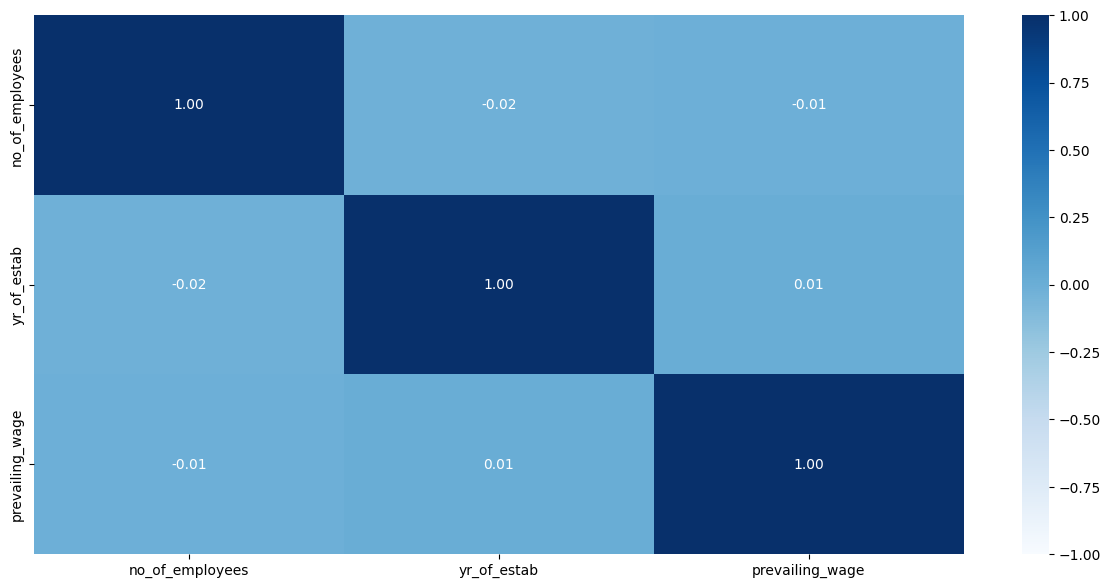

In [176]:
# Correlation plot
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Blues")
plt.show()

**no_of_employees** and **prevailing_wage** have low negative correlation (-0.01) .

**yr_of_estab** and **prevailing_wage** have a +0.01 correlation — technically positive, but extremely weak.

**no_of_employees** and **yr_of_estab** have a low negative correlation(-0.02).  

**Overall, the heatmap shows that there are no strong linear correlations between the numerical variables in the dataset.**

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All  Certified (%)  Denied (%)
education_of_employee                                                     
All                        17018    8462  25480          66.79       33.21
Bachelor's                  6367    3867  10234          62.21       37.79
High School                 1164    2256   3420          34.04       65.96
Master's                    7575    2059   9634          78.63       21.37
Doctorate                   1912     280   2192          87.23       12.77
------------------------------------------------------------------------------------------------------------------------


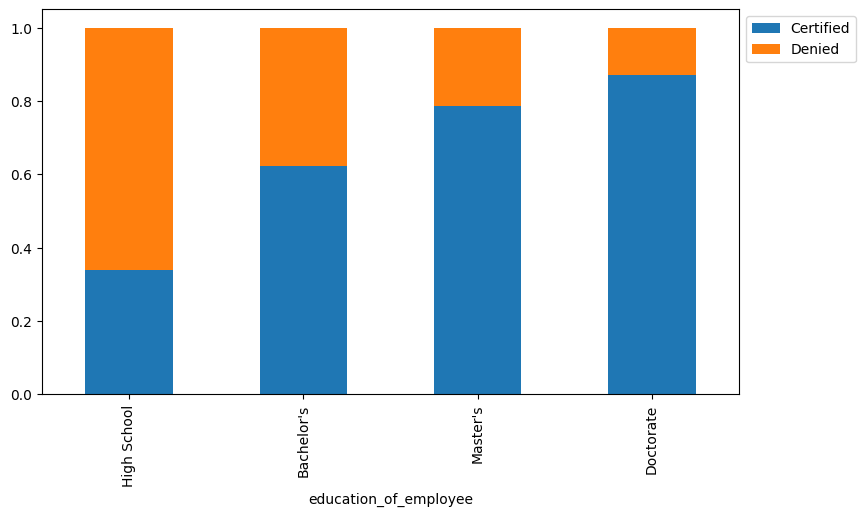

In [177]:
stacked_barplot(data, 'education_of_employee', 'case_status')

**Observation:**

Applicants with **Doctorate** degrees have the highest certification rate at 87.23%.

Applicants with **Master's** degrees also have a high certification rate at 78.63%, second to Doctorates.

Applicants with **Bachelor's** degrees have a lower certification rate at 62.21% compared to those with Master's and Doctorates.

Applicants with **High School** education have the lowest certification rate at 34.04%.

We can draw conclusion, a higher level of education is associated with a higher chance of visa certification.


#### How does visa status vary across different continents?

case_status    Certified  Denied    All  Certified (%)  Denied (%)
continent                                                         
All                17018    8462  25480          66.79       33.21
Asia               11012    5849  16861          65.31       34.69
North America       2037    1255   3292          61.88       38.12
Europe              2957     775   3732          79.23       20.77
South America        493     359    852          57.86       42.14
Africa               397     154    551          72.05       27.95
Oceania              122      70    192          63.54       36.46
------------------------------------------------------------------------------------------------------------------------


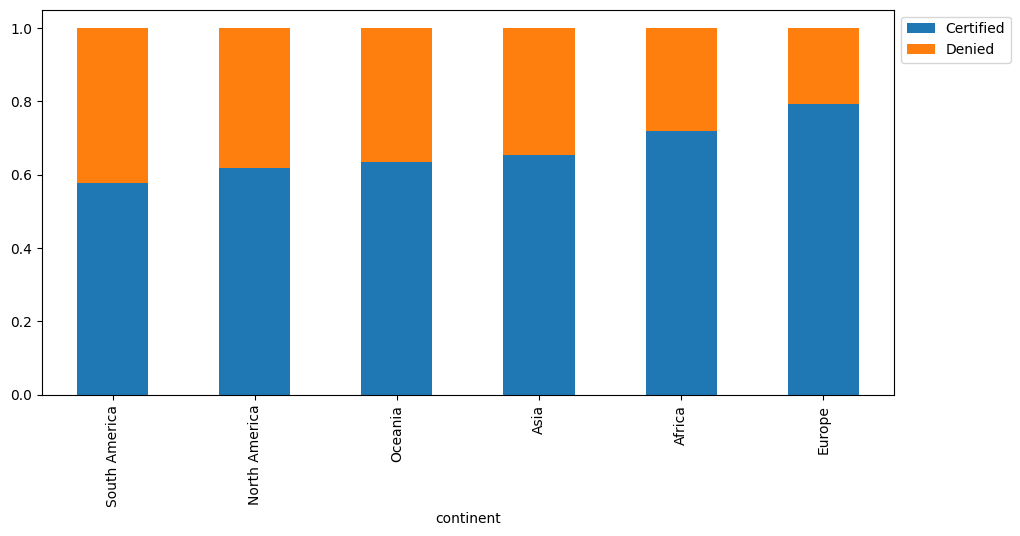

In [178]:
stacked_barplot(data, 'continent', 'case_status')

**Observation:**

**Europe** has the highest certification rate at 79.23%, and the lowest denial rate at 20.77%.

**Africa** has the second highest certification rate at 72.05%.

**Asia** has the highest number of applications, but a certification rate of 65.31%, which is lower than Europe and Africa. Their denial rate is 34.69%.

**North America** has a certification rate of 61.88%.

**Oceania** has a certification rate of 63.54%.

**South America** has the lowest certification rate at 57.86%, and the highest denial rate at 42.14%.


#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All  Certified (%)  Denied (%)
has_job_experience                                                     
All                     17018    8462  25480          66.79       33.21
N                        5994    4684  10678          56.13       43.87
Y                       11024    3778  14802          74.48       25.52
------------------------------------------------------------------------------------------------------------------------


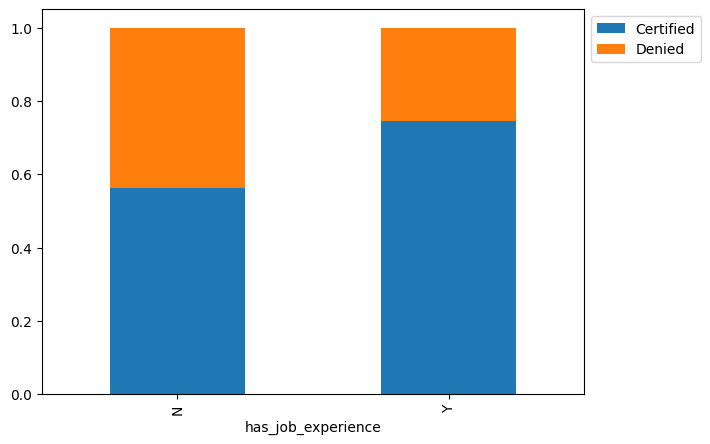

In [179]:
stacked_barplot(data, 'has_job_experience', 'case_status')

**Observation:**

Applicants with job experience ('Y') have a significantly higher certification rate at 74.48%.

Applicants without job experience ('N') have a lower certification rate at 56.13%.

This clearly indicates that having prior work experience positively influences the chances of visa certification.

#### Is the prevailing wage consistent across all regions of the US?

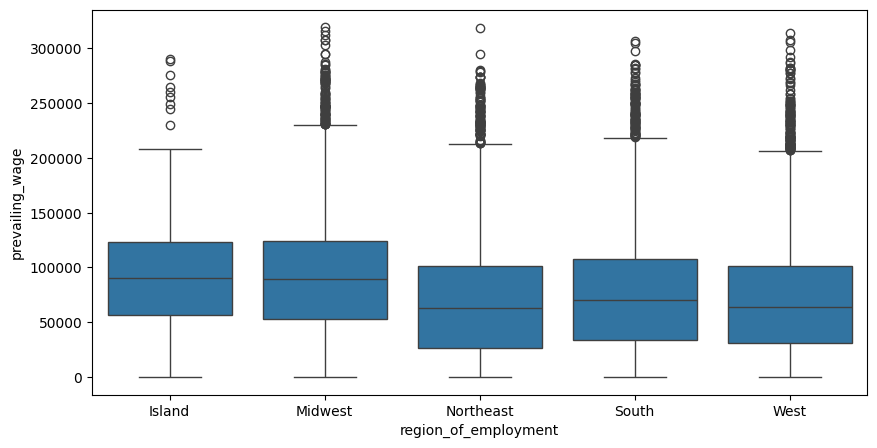

In [180]:
#Box plot on prevalling wage with region_of_employment
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='region_of_employment', y='prevailing_wage')
plt.show()

**Observations:**

**Median Wage**: The median prevailing wage is consistent across all regions, though the Island region shows a slightly higher median compared to the others.

**Interquartile Range (IQR)**: The spread of wages (middle 50%) is quite similar for all regions, suggesting uniformity in wage distribution.

**Outliers**: Every region contains several high outliers — individuals earning significantly above the standard range.






#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

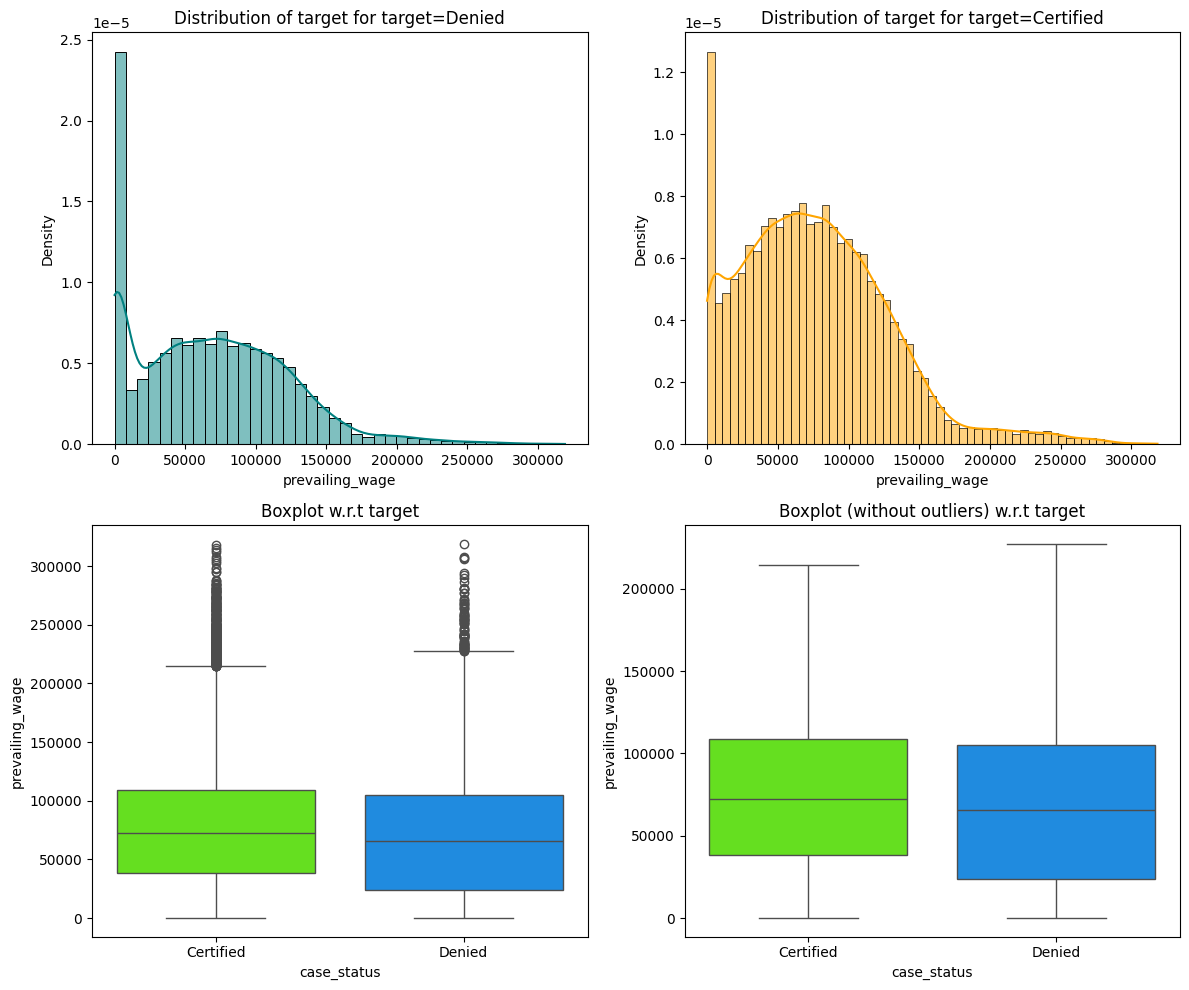

In [181]:
#distribution of prevailing wage and case status
distribution_plot_wrt_target(data,'prevailing_wage', 'case_status')

**Observations:**

The distributions of prevailing wage for both 'Certified' and 'Denied' cases  overlaps, this indicata that prevailing wage alone may not be a strong distinguishing factor.

However, the boxplots show that the median prevailing wage for 'Certified' cases is slightly higher than for 'Denied' cases. This shows for certified visas to be associated with higher prevailing wages.

Outliers in both certified and denied cases show that some visa applications with exceptionally high prevailing wages exist in both.

In conclusion, while there's a slight difference in median prevailing wage but the distributions are quite similar. This indicate that prevailing wage is not the sole determinant of visa status, and other factors are also playing role.




#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All  Certified (%)  Denied (%)
unit_of_wage                                                     
All               17018    8462  25480          66.79       33.21
Year              16047    6915  22962          69.89       30.11
Hour                747    1410   2157          34.63       65.37
Week                169     103    272          62.13       37.87
Month                55      34     89          61.80       38.20
------------------------------------------------------------------------------------------------------------------------


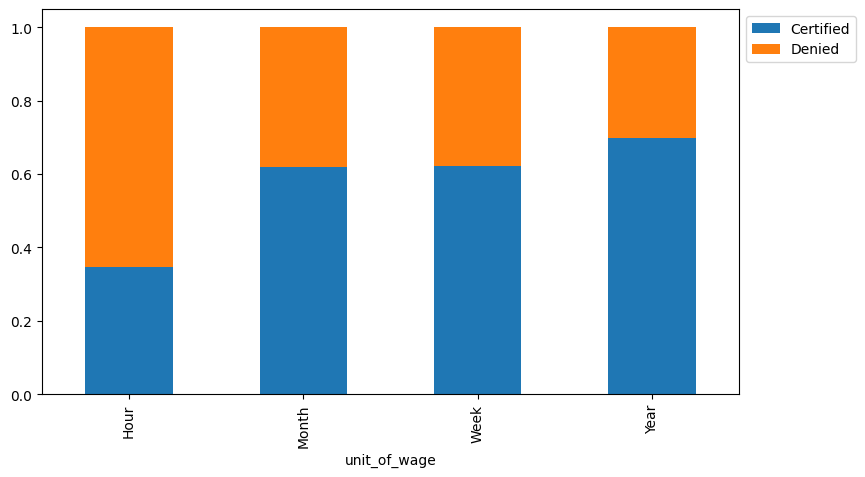

In [182]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

**Observastions:**

Applicants with a **prevailing wage** with **'Year'** have the highest certification rate at 69.89%.

Applicants with a **prevailing wage** with **'Hour'** have the lowest certification rate at 34.63%, and the highest denial rate at 65.37%.

Applicants with a **prevailing wage** with **'Week'** and **'Month'** have similar certification rates at 62.13% and 61.80% respectively.

This suggests that the unit of **prevailing wage** does have an impact on  visa application certification.  Applications having an **'Year'** wage unit being the most likely to be certified, and **'hourly'** wage units being the least likely.



## Data Pre-processing

### Outlier Check

In [183]:
from scipy.stats import zscore

# --- IQR Method ---
print("Detecting Outliers using IQR:")
print("-" * 50)

for col in data:
    if pd.api.types.is_numeric_dtype(data[col]):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find indices of outliers for the current column using IQR
        outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index

        print(f"Number of outliers detected in '{col}' using IQR: {len(outlier_indices)}")

print("\n" + "="*50 + "\n") # Separator

# --- Z-score Method ---
print("Detecting Outliers using Z-score (threshold = 3):")
print("-" * 50)

threshold = 3 # Common threshold for Z-score

for col in data:
    if pd.api.types.is_numeric_dtype(data[col]):
        # Calculate Z-scores for the current column
        z_scores = np.abs(zscore(data[col]))

        # Find indices of data points where the absolute Z-score is greater than the threshold
        outlier_indices = data[z_scores > threshold].index
        print(f"Number of outliers detected in '{col}' using Z-score: {len(outlier_indices)}")

Detecting Outliers using IQR:
--------------------------------------------------
Number of outliers detected in 'no_of_employees' using IQR: 1556
Number of outliers detected in 'yr_of_estab' using IQR: 3260
Number of outliers detected in 'prevailing_wage' using IQR: 427


Detecting Outliers using Z-score (threshold = 3):
--------------------------------------------------
Number of outliers detected in 'no_of_employees' using Z-score: 429
Number of outliers detected in 'yr_of_estab' using Z-score: 695
Number of outliers detected in 'prevailing_wage' using Z-score: 294


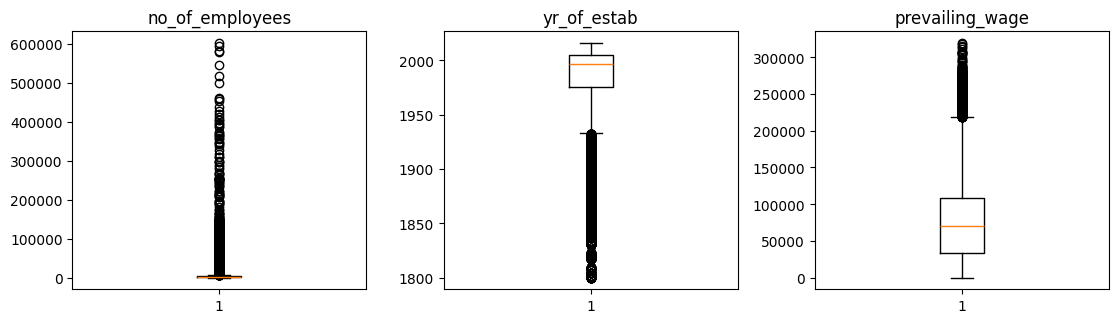

In [184]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

**no_of_employees:** The boxplot shows a large number of outliers on the higher end. This indicates that a significant number of companies have a much larger number of employees.

**yr_of_estab:** The boxplot for the year of establishment shows outliers on both the lower and higher ends, indicating some companies were established much earlier.

**prevailing_wage:** The boxplot for prevailing wage clearly shows a considerable number of outliers on the higher side. This suggests that some positions offer significantly higher wages than others.


### Data Preparation for modeling

In [185]:
X = data.drop(['case_status'],axis=1)
y = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# then we split the temporary set into train and validation
X_val, X_train, y_val, y_train = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print("Number of rows in train data =", X_train.shape[0], "\nPercentage of classes in training set:\n",y_train.value_counts(normalize=True) )
print("\n\nNumber of rows in validation data =", X_val.shape[0], "\nPercentage of classes in validation set:\n",y_val.value_counts(normalize=True) )
print("\n\nNumber of rows in test data =", X_test.shape[0], "\nPercentage of classes in test set:\n",y_test.value_counts(normalize=True))

Number of rows in train data = 4459 
Percentage of classes in training set:
 case_status
1    0.667863
0    0.332137
Name: proportion, dtype: float64


Number of rows in validation data = 13377 
Percentage of classes in validation set:
 case_status
1    0.667938
0    0.332062
Name: proportion, dtype: float64


Number of rows in test data = 7644 
Percentage of classes in test set:
 case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


In [186]:
# Encoding categorical variables
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Define categorical features
categorical_features = ['continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position']

# define individual transformers in a pipeline
categorical_preprocessing = Pipeline([
    ('encoder', onehot_encoder)
    ])

#Combining all transformations
preprocessor = ColumnTransformer([
        ('cat', categorical_preprocessing, categorical_features)
],remainder='passthrough')


pipeline =Pipeline([
    ('preprocessor', preprocessor)
])


In [187]:
X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)

print("Shape of X_train_encoded:", X_train.shape)
print("Shape of X_val_encoded:", X_val.shape)
print("Shape of X_test_encoded:", X_test.shape)

Shape of X_train_encoded: (4459, 28)
Shape of X_val_encoded: (13377, 28)
Shape of X_test_encoded: (7644, 28)


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [188]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [189]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [190]:
def plot_cv_validation_comparison(performance_summary_df, cv_results_list, model_names_list):
    """
    Generates a side-by-side bar plot comparing Mean CV F1 and Validation F1
    and a boxplot of CV scores.

    Args:
        performance_summary_df (pd.DataFrame): DataFrame containing model performance
                                               with columns 'Model', 'Mean CV F1',
                                               and 'Validation F1'.
        cv_results_list (list): A list where each element is an array of CV scores for a model.
        model_names_list (list): A list of model names corresponding to cv_results_list.
    """
    # Melt the DataFrame to have 'Metric' as a column
    performance_melted_cv_val = performance_summary_df.melt(
        id_vars='Model',
        value_vars=['Mean CV F1', 'Validation F1'], # Changed to F1
        var_name='Metric',
        value_name='F1 Score' # Changed to F1 Score
    )

    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(
        data=performance_melted_cv_val,
        x='Model',
        y='F1 Score', # Changed to F1 Score
        hue='Metric',
        palette='viridis'
    )

    plt.title('Model Comparison: Mean CV F1 vs. Validation F1') # Changed to F1
    plt.xlabel('Model')
    plt.ylabel('F1 Score') # Changed to F1 Score
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='F1 Score Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Changed to F1 Score Type
    plt.tight_layout()

    # Add values on top of the bars
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.3f', label_type='edge')

    plt.show()

    # Boxplot for CV scores
    fig2 = plt.figure(figsize=(11, 5))

    fig2.suptitle("Algorithm Cross-Validation F1 Comparison") # Changed to F1
    ax2 = fig2.add_subplot(111)

    plt.boxplot(cv_results_list)
    ax2.set_xticklabels(model_names_list)
    ax2.set_ylabel('F1 Score') # Changed to F1 Score
    plt.xticks(rotation=45, ha='right')

    plt.show()

In [191]:

def evaluate_models_performance(models, X_train, y_train, X_val, y_val, scorer):
    """
    Evaluates the performance of multiple classification models using cross-validation
    and a validation set.

    Args:
        models (list): A list of tuples, where each tuple contains the model name
                       (string) and the model object.
        X_train (array-like): Training data features.
        y_train (array-like): Training data target.
        X_val (array-like): Validation data features.
        y_val (array-like): Validation data target.
        scorer (scorer object): The scoring metric to use for cross-validation.

    Returns:
        tuple: A tuple containing lists of model names, mean CV scores, validation scores,
               difference scores, and raw CV results.
    """
    cv_score_result = []
    validation_results = []
    difference_results = []
    model_names = []
    results1 = []

    for name, model in models:
        model_names.append(name)

        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
        cv_result = cross_val_score(
            estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
        )
        mean_cv_score = cv_result.mean()
        cv_score_result.append(mean_cv_score)
        results1.append(cv_result)

        model.fit(X_train, y_train)
        validation_score = f1_score(y_val, model.predict(X_val))
        validation_results.append(validation_score)

        difference = mean_cv_score - validation_score
        difference_results.append(difference)

    return model_names, cv_score_result, validation_results, difference_results, results1

In [192]:
def summarize_and_store_performance(model_names, cv_score_result, validation_results, difference_results):

    # Create a DataFrame to display the results for this batch
    performance_summary_df = pd.DataFrame({
        'Model': model_names,
        'Mean CV F1': cv_score_result,
        'Validation F1': validation_results,
        'Difference (CV - Val)': difference_results
    })

    global global_performance_summary_df

    #global_performance_summary_df = pd.DataFrame(columns=['Model', 'Mean CV F1', 'Validation F1', 'Difference (CV - Val)'])
    # Display the performance summary table, sorted by Validation F1 score
    performance_summary_df = performance_summary_df.sort_values(by='Validation F1', ascending=False)

    # Append the new row to the global performance summary DataFrame
    global_performance_summary_df = pd.concat([global_performance_summary_df, performance_summary_df], ignore_index=True)

    # Reset index for display
    performance_summary_df = performance_summary_df.reset_index(drop=True)

    return performance_summary_df


#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [193]:
scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True)

**Observations:**
In this business context minimizing false positives is important because certifying applicants who might later be denied could cost employers time, money, or lead to compliance issues, so **precision** should be a primary concern.

At the same time, we also want to minimize false negatives and don’t want to miss good candidates who should be approved — this is where **recall** matters. To make sure we are doing both well, we look at the ** **F1 score** **, which helps us find a good balance between precision and recall for fair and accurate results.




**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [194]:
# Initialize global_performance_summary_df as an empty DataFrame with the correct columns
global_performance_summary_df = pd.DataFrame(columns=['Model', 'Mean CV F1', 'Validation F1', 'Difference (CV - Val)'])

In [195]:
models = []

# Appending models into the list
models.append(("Bagging with Original data", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest with Original data", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM with Original data", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost with Original data", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost with Original data", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree with Original data", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

model_names,cv_score_result,validation_results,difference_results, result = evaluate_models_performance(models, X_train, y_train, X_val, y_val, scorer)
performance_summary_orig_df = summarize_and_store_performance(model_names, cv_score_result, validation_results, difference_results)

print("\n" + "Training and Validation Performance:" + "\n")
display(performance_summary_orig_df)


Training and Validation Performance:



,Model,Mean CV F1,Validation F1,Difference (CV - Val)
0,GBM with Original data,0.822457,0.817249,0.005208
1,Adaboost with Original data,0.823275,0.817063,0.006212
2,Random forest with Original data,0.809561,0.801702,0.007859
3,Xgboost with Original data,0.790806,0.796472,-0.005667
4,Bagging with Original data,0.782443,0.774019,0.008424
5,dtree with Original data,0.756635,0.740587,0.016048


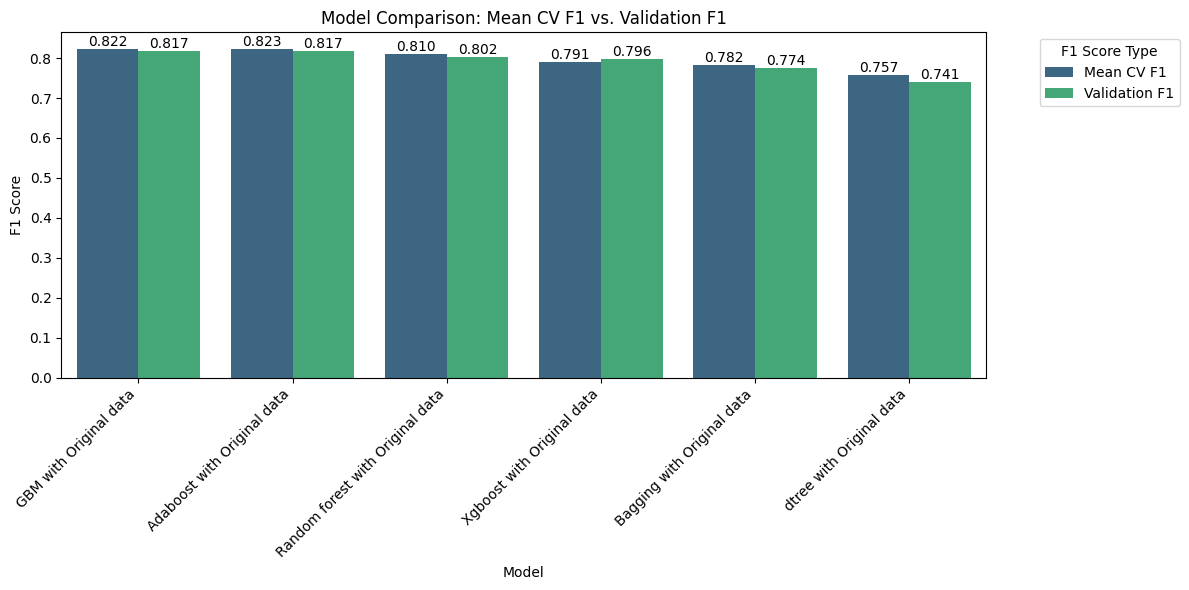

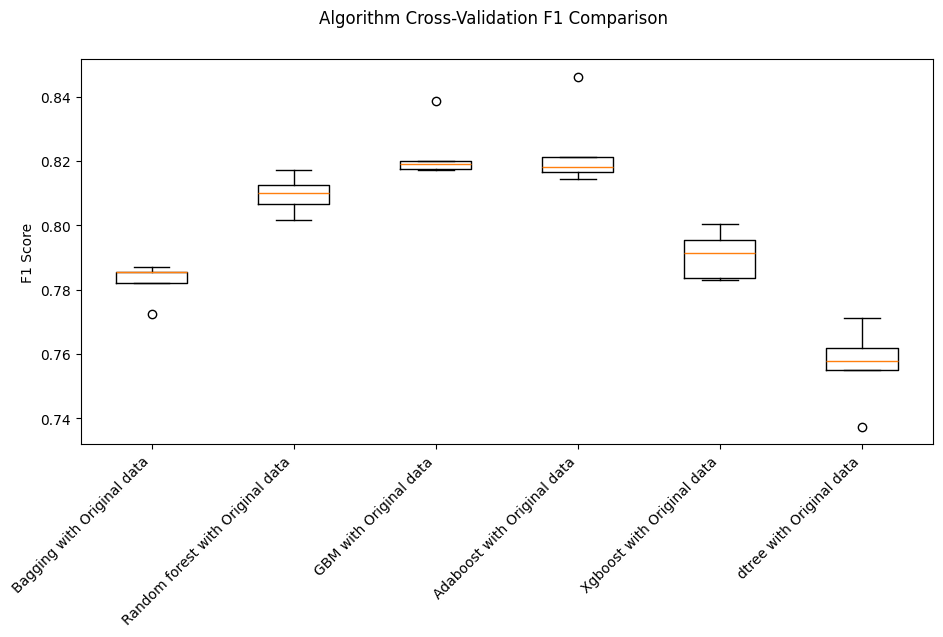

In [196]:
#Plot validation comparison
plot_cv_validation_comparison(performance_summary_orig_df, result, model_names)

**Observations:**

**GBM** whas the highest Validation F1 score (0.817), followed by Adaboost (0.817). GBM and AdaBoost with Original data show high median CV F1 scores.

**Random Forest** also performs well with a Validation F1 score of 0.802.
**Random Forest** also has a good median CV F1 score, but with a slightly wider boxplot compared to GBM and AdaBoost.

**Bagging** and **Decision Tree** have lower Validation F1 scores compared to the boosting and random forest models.

The difference between **Mean CV F1** and **Validation F1** is relatively small and positive for most models, indicating slightly better performance on the cross-validation folds compared to the validation set, difference is not large enough to suggest significant overfitting.

**Summary:**
Based on model trained on the original imbalanced data, **GBM** and **AdaBoost** are the top-performing models in terms of both validation F1 score and consistent cross-validation performance. **Random Forest** is also a strong contender.

### Model Building with Oversampled data

In [197]:
#Over sampleing data using SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1) ## Complete the code to set the k-nearest neighbors
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 2978
Before OverSampling, counts of label '0': 1481 

After OverSampling, counts of label '1': 2978
After OverSampling, counts of label '0': 2978 

After OverSampling, the shape of train_X: (5956, 28)
After OverSampling, the shape of train_y: (5956,) 



In [198]:
models = []

# Appending models into the list
models.append(("Bagging with Oversampled data", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest with Oversampled data", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM with Oversampled data", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost with Oversampled data", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost with Oversampled data", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree with Oversampled data", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

model_names,cv_score_result,validation_results,difference_results, result = evaluate_models_performance(models, X_train_over, y_train_over, X_val, y_val, scorer)
performance_summary_over_df = summarize_and_store_performance(model_names, cv_score_result, validation_results, difference_results)

print("\n" + "Training and Validation Performance:" + "\n")
display(performance_summary_over_df)


Training and Validation Performance:



,Model,Mean CV F1,Validation F1,Difference (CV - Val)
0,GBM with Oversampled data,0.813685,0.815336,-0.001651
1,Adaboost with Oversampled data,0.814014,0.809411,0.004603
2,Random forest with Oversampled data,0.803958,0.798174,0.005784
3,Xgboost with Oversampled data,0.796155,0.797918,-0.001763
4,Bagging with Oversampled data,0.777627,0.768510,0.009117
5,dtree with Oversampled data,0.741829,0.740222,0.001607


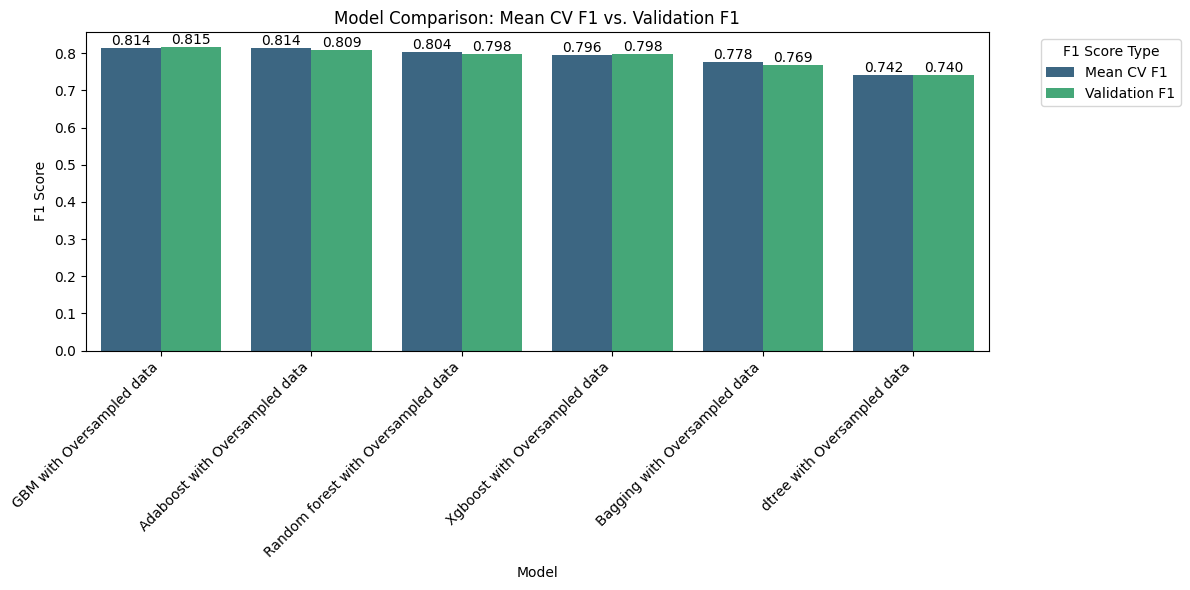

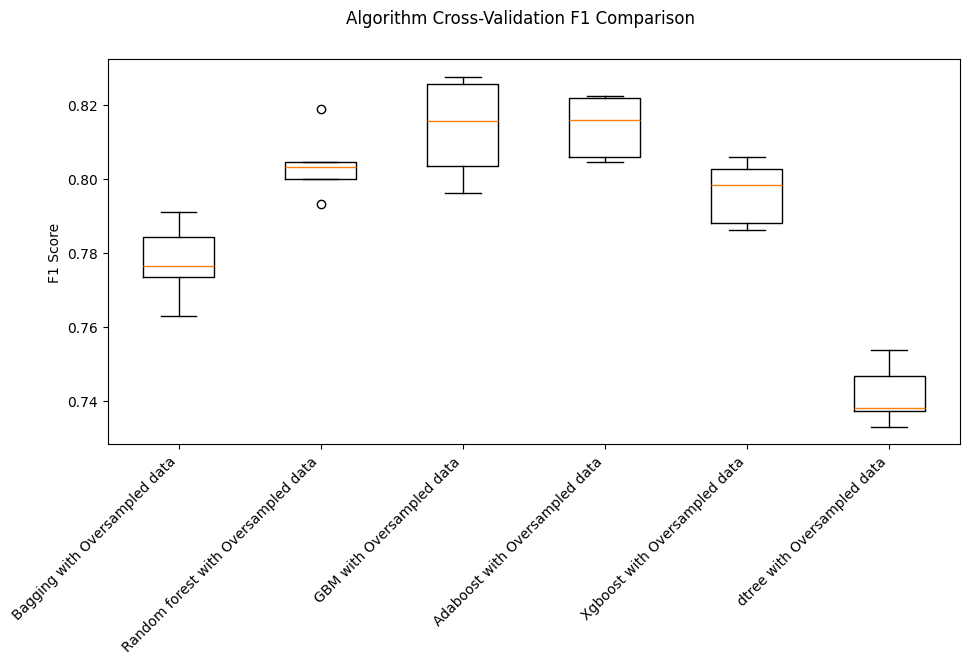

In [199]:
#Plot validation comparison
plot_cv_validation_comparison(performance_summary_over_df, result, model_names)

**Observations:**

**Validation F1 Scores**: Models trained on oversampled data shows high validation F1 scores, which are relatively close to their mean cross-validation F1 scores.

**Top Performers:** GBM and AdaBoost with Oversampled data are the top-performing models based on their validation F1 scores.

boxplot showing **GBM**, **AdaBoost**, **Random Forest**, and **Bagging**  consistent performance across cross-validation folds on the oversampled data.

This suggests that oversampling is an effective technique for improving F1 scores, and **GBM** and **AdaBoost** are strong models when trained on oversampled data.


### Model Building with Undersampled data

In [200]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))

print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 2978
Before UnderSampling, counts of label '0': 1481 

After UnderSampling, counts of label '1': 1481
After UnderSampling, counts of label '0': 1481 

After UnderSampling, the shape of train_X: (2962, 28)
After UnderSampling, the shape of train_y: (2962,) 



In [201]:
models = []

# Appending models into the list
models.append(("Bagging with Undersampled data", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest with Undersampled data", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM with Undersampled data", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost with Undersampled data", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost with Undersampled data", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree with Undersampled data", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

model_names,cv_score_result,validation_results,difference_results, results = evaluate_models_performance(models, X_train_un, y_train_un, X_val, y_val, scorer)
performance_summary_un_df = summarize_and_store_performance(model_names, cv_score_result, validation_results, difference_results)

print("\n" + "Training and Validation Performance:" + "\n")
display(performance_summary_un_df)


Training and Validation Performance:



,Model,Mean CV F1,Validation F1,Difference (CV - Val)
0,GBM with Undersampled data,0.702678,0.771104,-0.068427
1,Adaboost with Undersampled data,0.699790,0.760498,-0.060708
2,Random forest with Undersampled data,0.676670,0.739245,-0.062575
3,Xgboost with Undersampled data,0.670884,0.738495,-0.067611
4,Bagging with Undersampled data,0.642215,0.688771,-0.046556
5,dtree with Undersampled data,0.637283,0.683477,-0.046194


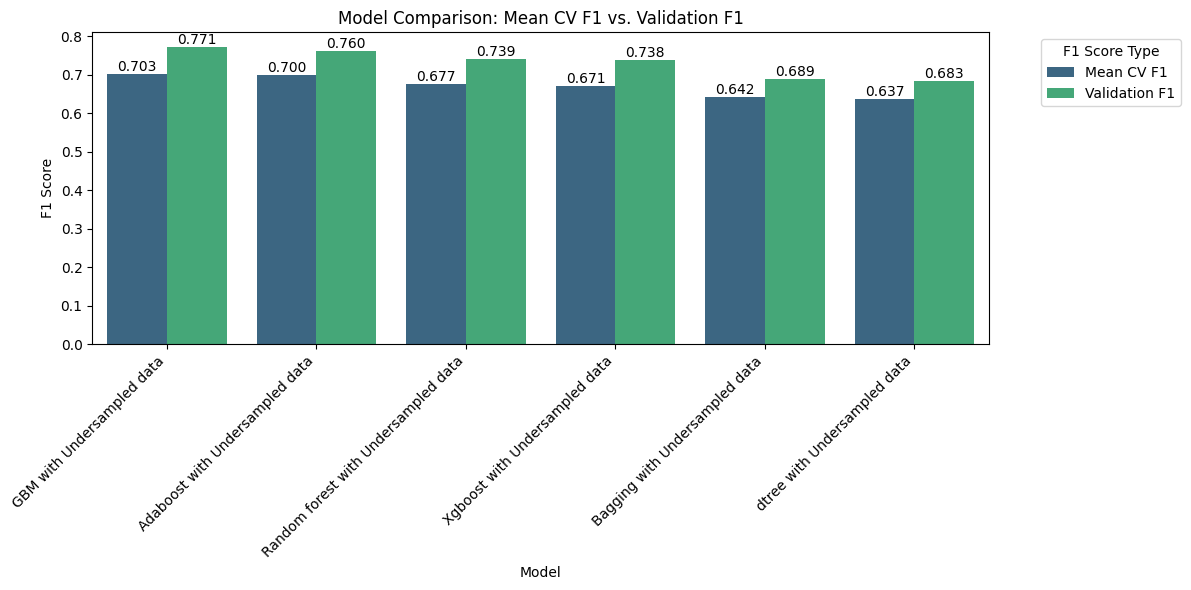

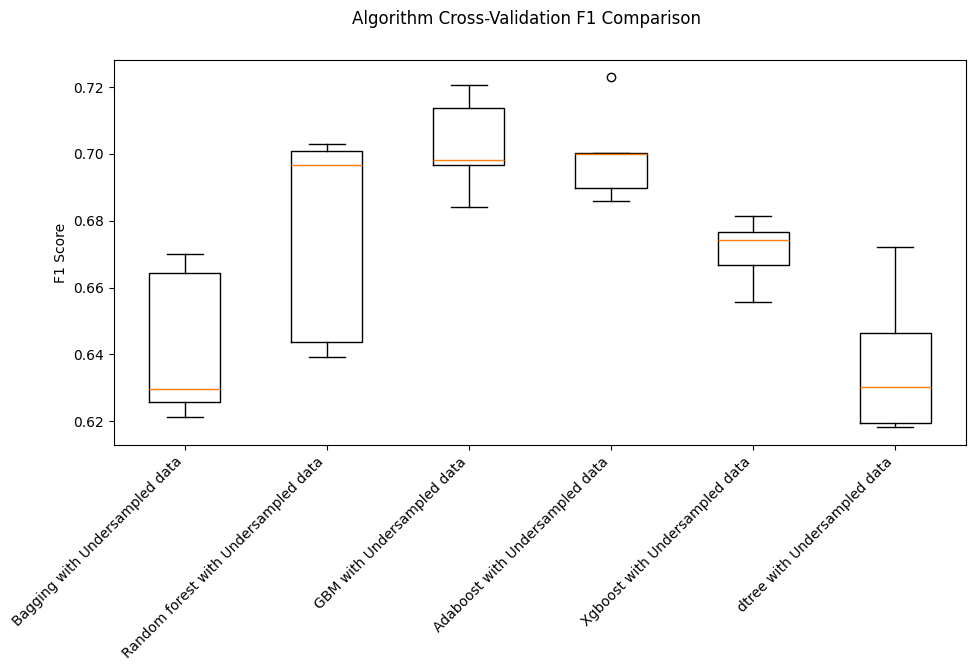

In [202]:
#Plot validation comparison
plot_cv_validation_comparison(performance_summary_un_df, results, model_names)

**Observations:**

**GBM** achieved the highest **Validation F1** score at 0.7711 followed by **Adaboost** second highest Validation F1 score at 0.7605 and **Random forest** with a Validation F1 score of 0.7392.

**GBM** has a relatively high median, suggesting consistent performance and a higher F1 score during cross-validation on the balanced data.

**Adaboost** and **Random Forest** with Undersampled data also show good median CV F1 scores but with slightly wider boxes, indicating more variability in performance across the cross-validation folds.

**Decision Tree** with Undersampled data has the lowest median CV F1 score and one of the widest boxes, suggesting lower and more inconsistent performance during cross-validation.




### Model Performance Summary

In [203]:
#sort global_performance_summary_df with 'Validation F1' desc
global_performance_summary_df = global_performance_summary_df.sort_values(by='Validation F1', ascending=False)
global_performance_summary_df = global_performance_summary_df.reset_index(drop=True)
display(global_performance_summary_df)

,Model,Mean CV F1,Validation F1,Difference (CV - Val)
0,GBM with Original data,0.822457,0.817249,0.005208
1,Adaboost with Original data,0.823275,0.817063,0.006212
2,GBM with Oversampled data,0.813685,0.815336,-0.001651
3,Adaboost with Oversampled data,0.814014,0.809411,0.004603
4,Random forest with Original data,0.809561,0.801702,0.007859
5,Random forest with Oversampled data,0.803958,0.798174,0.005784
6,Xgboost with Oversampled data,0.796155,0.797918,-0.001763
7,Xgboost with Original data,0.790806,0.796472,-0.005667
8,Bagging with Original data,0.782443,0.774019,0.008424
9,GBM with Undersampled data,0.702678,0.771104,-0.068427


Based on the 'Validation F1' score, here are the observations on the top 3 best-performing models:

**1. GBM with Original data:**
*   Highest Validation F1 score of 0.8172.
*   Mean CV F1 score is 0.8225.
*   The difference between Mean CV F1 and Validation F1 is 0.0052, indicating slightly better performance on cross-validation folds but a very small difference, suggesting good generalization.

**2. Adaboost with Original data:**
*   Has the second highest Validation F1 score of 0.8171.
*   Its Mean CV F1 score is 0.8233.
*   The difference between Mean CV F1 and Validation F1 is 0.0062, also a small positive difference indicating good generalization.

**3. GBM with Oversampled data:**
*   Has the third highest Validation F1 score of 0.8153.
*   Its Mean CV F1 score is 0.8137.
*   The difference between Mean CV F1 and Validation F1 is -0.0017, a very small negative difference, suggesting slightly better performance on the validation set compared to the mean cross-validation performance.

**Overall Summary of Top Performers:**

*   The top 3 models are all boosting algorithms (GBM and AdaBoost).
*   Models trained on the original imbalanced data (GBM and AdaBoost) occupy the top two spots, suggesting that even without explicit oversampling or undersampling, these models perform very well on this dataset based on the F1 score.
*   GBM trained on oversampled data is a close third, indicating that oversampling also helps boosting models achieve high F1 scores.
*   All three top models show very small differences between their Mean CV F1 and Validation F1 scores, which is a good sign of stable and generalizable performance.

These observations suggest that boosting models, particularly GBM and AdaBoost, are strong candidates for Hypertuning.

## Hyperparameter Tuning

###1.Gradient Boosting Model Hyperparameter tuning with Orignal Data

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

In [204]:
#Gradient Boosting hyperparameter tuning
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.1, 0.05, 0.01, 0.005],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "max_features": ["sqrt", "log2", 0.3, 0.5]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

CPU times: user 5min 46s, sys: 2.19 s, total: 5min 48s
Wall time: 5min 48s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [205]:
print("Best parameters are \n{} \n with CV score={}:"
      .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are 
{'subsample': 1.0, 'n_estimators': 100, 'max_features': 0.3, 'learning_rate': 0.05} 
 with CV score=0.8260642189620089:


In [206]:
tuned_GBM_orig = randomized_cv.best_estimator_
tuned_GBM_orig.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=0.3, random_state=1)

In [207]:
tuned_GBM_orig_train_perf = model_performance_classification_sklearn(tuned_GBM_orig, X_train_over, y_train_over)
tuned_GBM_orig_val_perf = model_performance_classification_sklearn(tuned_GBM_orig, X_val, y_val)

# Create a DataFrame to store both training and validation performance
tuned_GBM_orig_performance_df = pd.concat([tuned_GBM_orig_train_perf.T, tuned_GBM_orig_val_perf.T], axis=1)
tuned_GBM_orig_performance_df.columns = ['Training Performance', 'Validation Performance']

print('Tuned GBM Model Performance:')
display(tuned_GBM_orig_performance_df)

Tuned GBM Model Performance:


,Training Performance,Validation Performance
Accuracy,0.681162,0.742992
Recall,0.901948,0.888752
Precision,0.625670,0.764661
F1,0.738825,0.822050


**Observation**

The performance metrics on the validation set are slightly lower than those on the training set, but the difference is relatively small. This indicates that the tuned GBM model is well to unseen data and is not significantly overfitting the training data.

The **F1 score** on the validation set is 0.8221, which is the primary evaluation metric we are focusing on. This is a strong F1 score for this model.

Overall, the tuned **Gradient Boosting model** trained on the **original data** shows good performance, with a solid F1 score on the validation set and performs adequately on the training data.


###2.AdaBoost Hyperparameter tuning on orignal Data

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

In [208]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,75,85,100],
    "learning_rate": [1.0, 0.5, 0.1, 0.01],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

CPU times: user 3min 4s, sys: 1.06 s, total: 3min 5s
Wall time: 3min 13s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=AdaBoostClassifier(random_state=1), n_iter=50,
                   n_jobs=-2,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=2,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=3,
                                                                             random_state=1)],
                                        'learning_rate': [1.0, 0.5, 0.1, 0.01],
                                        'n_estimators': [50, 75, 85, 100]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [209]:
print("Best parameters are \n{} \n with CV score={}:"
      .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are 
{'n_estimators': 100, 'learning_rate': 0.5, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} 
 with CV score=0.8261903594047615:


In [210]:
tuned_Adaboost_orig = randomized_cv.best_estimator_
tuned_Adaboost_orig.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.5, n_estimators=100, random_state=1)

In [211]:
tuned_Adaboost_orig_train_perf = model_performance_classification_sklearn(tuned_Adaboost_orig, X_train, y_train)
tuned_Adaboost_orig_val_perf = model_performance_classification_sklearn(tuned_Adaboost_orig, X_val, y_val)

# Create a DataFrame to store both training and validation performance
tuned_Adaboost_orig_performance_df = pd.concat([tuned_Adaboost_orig_train_perf.T, tuned_Adaboost_orig_val_perf.T], axis=1)
tuned_Adaboost_orig_performance_df.columns = ['Training Performance', 'Validation Performance']

print('Tuned GBM Model Performance:')
display(tuned_Adaboost_orig_performance_df)

Tuned GBM Model Performance:


,Training Performance,Validation Performance
Accuracy,0.755999,0.740674
Recall,0.891538,0.876553
Precision,0.776316,0.767994
F1,0.829947,0.818690


**Observation:**

Comparison of Training and Validation Performance:

Similar to the tuned **GBM model**, the tuned **AdaBoost model** shows slightly lower performance metrics on the validation set compared to the training set. The differences are small, suggesting good generalization to unseen data.

The **F1 score** on the validation set is 0.8187, which is very close to the tuned **GBM's validation F1** score (0.8221).


###3.Gradient Boosting Model Hyperparameter tuning with Oversampled data

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

In [212]:
#Gradient Boosting hyperparameter tuning
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.1, 0.05, 0.01, 0.005],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "max_features": ["sqrt", "log2", 0.3, 0.5]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

CPU times: user 8min 24s, sys: 3.08 s, total: 8min 27s
Wall time: 8min 25s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [213]:
print("Best parameters are \n{} \n with CV score={}:"
      .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are 
{'subsample': 1.0, 'n_estimators': 100, 'max_features': 0.3, 'learning_rate': 0.05} 
 with CV score=0.8184233266434775:


In [214]:
tuned_GBM_over = randomized_cv.best_estimator_
tuned_GBM_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.05, max_features=0.3, random_state=1)

In [215]:
tuned_GBM_over_train_perf = model_performance_classification_sklearn(tuned_GBM_over, X_train_over, y_train_over)
tuned_GBM_over_val_perf = model_performance_classification_sklearn(tuned_GBM_over, X_val, y_val)

# Create a DataFrame to store both training and validation performance
tuned_GBM_performance_df = pd.concat([tuned_GBM_over_train_perf.T, tuned_GBM_over_val_perf.T], axis=1)
tuned_GBM_performance_df.columns = ['Training Performance', 'Validation Performance']

print('Tuned GBM Model Performance:')
display(tuned_GBM_performance_df)


Tuned GBM Model Performance:


,Training Performance,Validation Performance
Accuracy,0.817663,0.744263
Recall,0.868032,0.850588
Precision,0.788591,0.784638
F1,0.826407,0.816283


###4.AdaBoost Hyperparameter tuning on Oversampled data

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

In [216]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,75,85,100],
    "learning_rate": [1.0, 0.5, 0.1, 0.01],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

CPU times: user 4min 48s, sys: 1.51 s, total: 4min 50s
Wall time: 4min 50s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=AdaBoostClassifier(random_state=1), n_iter=50,
                   n_jobs=-2,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=2,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=3,
                                                                             random_state=1)],
                                        'learning_rate': [1.0, 0.5, 0.1, 0.01],
                                        'n_estimators': [50, 75, 85, 100]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [217]:

print("Best parameters are \n{} \n with CV score={}:"
      .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are 
{'n_estimators': 100, 'learning_rate': 1.0, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} 
 with CV score=0.8188011629823441:


In [218]:
tuned_Adaboost_over = randomized_cv.best_estimator_
tuned_Adaboost_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   n_estimators=100, random_state=1)

In [219]:
tuned_Adaboost_over_train_perf = model_performance_classification_sklearn(tuned_Adaboost_over, X_train_over, y_train_over)
tuned_Adaboost_over_val_perf = model_performance_classification_sklearn(tuned_Adaboost_over, X_val, y_val)

# Create a DataFrame to store both training and validation performance
tuned_Adaboost_performance_df = pd.concat([tuned_Adaboost_over_train_perf.T, tuned_Adaboost_over_val_perf.T], axis=1)
tuned_Adaboost_performance_df.columns = ['Training Performance', 'Validation Performance']

print('Tuned GBM Model Performance:')
display(tuned_Adaboost_performance_df)

Tuned GBM Model Performance:


,Training Performance,Validation Performance
Accuracy,0.811786,0.736862
Recall,0.871054,0.852714
Precision,0.778745,0.775629
F1,0.822317,0.812347


###5.Random Forest Hyperparameter tuning with Orignal Data

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

In [220]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125, 150],
    "min_samples_leaf": [1, 2, 4, 5, 10],
    "max_features": ["sqrt", "log2", None, 0.3, 0.5],
    "max_samples": [0.6, 0.7, 0.8, 0.9, 1.0]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

CPU times: user 4min 20s, sys: 1.58 s, total: 4min 21s
Wall time: 5min 25s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(random_state=1), n_iter=50,
                   n_jobs=-2,
                   param_distributions={'max_features': ['sqrt', 'log2', None,
                                                         0.3, 0.5],
                                        'max_samples': [0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'min_samples_leaf': [1, 2, 4, 5, 10],
                                        'n_estimators': [50, 75, 100, 125,
                                                         150]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [221]:
print("Best parameters are \n{} \n with CV score={}:"
      .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are 
{'n_estimators': 125, 'min_samples_leaf': 4, 'max_samples': 1.0, 'max_features': 0.3} 
 with CV score=0.8286309196257214:


In [222]:
tuned_RF_orig = randomized_cv.best_estimator_
tuned_RF_orig.fit(X_train, y_train)

RandomForestClassifier(max_features=0.3, max_samples=1.0, min_samples_leaf=4,
                       n_estimators=125, random_state=1)

In [224]:
tuned_RF_orig_train_perf = model_performance_classification_sklearn(tuned_RF_orig, X_train, y_train)
tuned_RF_orig_val_perf = model_performance_classification_sklearn(tuned_RF_orig, X_val, y_val)

# Create a DataFrame to store both training and validation performance
tuned_RF_orig_performance_df = pd.concat([tuned_RF_orig_train_perf.T, tuned_RF_orig_val_perf.T], axis=1)
tuned_RF_orig_performance_df.columns = ['Training Performance', 'Validation Performance']

print('Tuned GBM Model Performance:')
display(tuned_RF_orig_performance_df)

Tuned GBM Model Performance:


,Training Performance,Validation Performance
Accuracy,0.843687,0.739478
Recall,0.930826,0.854729
Precision,0.849525,0.777382
F1,0.888319,0.814223


###6.Random Forest Hyperparameter tuning with **Oversampled** Data

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

In [225]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125, 150],
    "min_samples_leaf": [1, 2, 4, 5, 10],
    "max_features": ["sqrt", "log2", None, 0.3, 0.5],
    "max_samples": [0.6, 0.7, 0.8, 0.9, 1.0]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

CPU times: user 5min 20s, sys: 1.73 s, total: 5min 22s
Wall time: 5min 39s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(random_state=1), n_iter=50,
                   n_jobs=-2,
                   param_distributions={'max_features': ['sqrt', 'log2', None,
                                                         0.3, 0.5],
                                        'max_samples': [0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'min_samples_leaf': [1, 2, 4, 5, 10],
                                        'n_estimators': [50, 75, 100, 125,
                                                         150]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [226]:
print("Best parameters are \n{} \n with CV score={}:"
      .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are 
{'n_estimators': 100, 'min_samples_leaf': 2, 'max_samples': 1.0, 'max_features': 'sqrt'} 
 with CV score=0.822368449446361:


In [230]:
tuned_RF_over = randomized_cv.best_estimator_
tuned_RF_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=1.0, min_samples_leaf=2, random_state=1)

In [231]:
tuned_RF_over_train_perf = model_performance_classification_sklearn(tuned_RF_over, X_train_over, y_train_over)
tuned_RF_over_val_perf = model_performance_classification_sklearn(tuned_RF_over, X_val, y_val)

# Create a DataFrame to store both training and validation performance
tuned_RF_over_performance_df = pd.concat([tuned_RF_over_train_perf.T, tuned_RF_over_val_perf.T], axis=1)
tuned_RF_over_performance_df.columns = ['Training Performance', 'Validation Performance']

print('Tuned GBM Model Performance:')
display(tuned_RF_over_performance_df)

Tuned GBM Model Performance:


,Training Performance,Validation Performance
Accuracy,0.913197,0.739254
Recall,0.948959,0.841074
Precision,0.885616,0.784201
F1,0.916194,0.811643


###7.XGBoost Hyperparameter tuning with Oversampled Data

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

In [232]:
%%time

# defining model
model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125],
    "subsample": [0.5, 0.7, 0.8, 1.0],
    "gamma": [0, 1, 3, 5, 8],
    "colsample_bytree": [0.3, 0.5, 0.7, 1.0],
    "colsample_bylevel": [0.3, 0.5, 0.7, 1.0]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

CPU times: user 1min 27s, sys: 1.1 s, total: 1min 29s
Wall time: 53.5 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           impo...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=1, ...),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'colsample_bylevel': [0.3, 0.5, 0.7,
                                                              1.0],
                                        'colsample_bytree': [0.3, 0.5, 0.7,
                                                             1.0],
                                        'gamma': [0, 1, 3, 5, 8],
                                        'n_estimators': [50, 75, 100, 125],
                                        'subsample': [0.5, 0.7, 0.8, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [233]:
print("Best parameters are \n{} \n with CV score={}:"
      .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are 
{'subsample': 1.0, 'n_estimators': 75, 'gamma': 5, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.3} 
 with CV score=0.8243145164492663:


In [234]:
tuned_XGB_over = randomized_cv.best_estimator_
tuned_XGB_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [235]:
tuned_XGB_over_train_perf = model_performance_classification_sklearn(tuned_XGB_over, X_train_over, y_train_over)
tuned_XGB_over_val_perf = model_performance_classification_sklearn(tuned_XGB_over, X_val, y_val)

# Create a DataFrame to store both training and validation performance
tuned_XGB_over_performance_df = pd.concat([tuned_XGB_over_train_perf.T, tuned_XGB_over_val_perf.T], axis=1)
tuned_XGB_over_performance_df.columns = ['Training Performance', 'Validation Performance']

print('Tuned GBM Model Performance:')
display(tuned_XGB_over_performance_df)

Tuned GBM Model Performance:


,Training Performance,Validation Performance
Accuracy,0.819846,0.745832
Recall,0.882136,0.859989
Precision,0.784413,0.781450
F1,0.830409,0.818841


## Model Performance Summary and Final Model Selection

In [242]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
      tuned_GBM_orig_train_perf.T,
      tuned_Adaboost_orig_train_perf.T,
      tuned_GBM_over_train_perf.T,
      tuned_Adaboost_over_train_perf.T,
      tuned_RF_orig_train_perf.T,
      tuned_RF_over_train_perf.T,
      tuned_XGB_over_train_perf.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with orignal data",
    "AdaBoost tuned with orignal data",
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with orignal data",
    "Random forest tuned with oversampled data",
    "XGBoost tuned with oversampled data",
]
print("Training performance comparison:")
display(models_train_comp_df)

# validation performance comparison
models_val_comp_df = pd.concat(
    [
      tuned_GBM_orig_val_perf.T,
      tuned_Adaboost_orig_val_perf.T,
      tuned_GBM_over_val_perf.T,
      tuned_Adaboost_over_val_perf.T,
      tuned_RF_orig_val_perf.T,
      tuned_RF_over_val_perf.T,
      tuned_XGB_over_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with orignal data",
    "AdaBoost tuned with orignal data",
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with orignal data",
    "Random forest tuned with oversampled data",
    "XGBoost tuned with oversampled data",
]
print("Validation performance comparison:")
display(models_val_comp_df)


Training performance comparison:


,Gradient Boosting tuned with orignal data,AdaBoost tuned with orignal data,Gradient Boosting tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with orignal data,Random forest tuned with oversampled data,XGBoost tuned with oversampled data
Accuracy,0.681162,0.755999,0.817663,0.811786,0.843687,0.913197,0.819846
Recall,0.901948,0.891538,0.868032,0.871054,0.930826,0.948959,0.882136
Precision,0.625670,0.776316,0.788591,0.778745,0.849525,0.885616,0.784413
F1,0.738825,0.829947,0.826407,0.822317,0.888319,0.916194,0.830409


Validation performance comparison:


,Gradient Boosting tuned with orignal data,AdaBoost tuned with orignal data,Gradient Boosting tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with orignal data,Random forest tuned with oversampled data,XGBoost tuned with oversampled data
Accuracy,0.742992,0.740674,0.744263,0.736862,0.739478,0.739254,0.745832
Recall,0.888752,0.876553,0.850588,0.852714,0.854729,0.841074,0.859989
Precision,0.764661,0.767994,0.784638,0.775629,0.777382,0.784201,0.781450
F1,0.822050,0.818690,0.816283,0.812347,0.814223,0.811643,0.818841


**Best Model:**

Based on test data results, the **XGBoost** model trained with **oversampled data** still comes out on top.

Given the business goal of identifying foreign workers for U.S. jobs, recall and F1 score become especially crucial. You want to minimize false negatives (i.e., qualified candidates being missed) without flooding the system with false positives.
Based on comparing multiple classification models across training and validation metrics like Accuracy, Recall, Precision, and F1 score, especially after tuning and using oversampling to address class imbalance the **best Model for deployment is XGBoost tuned with oversampled data**

Here are validation scores:
- **Validation Accuracy:** 0.7458 (highest among all)
- **Validation Recall:** 0.8599 (excellent for catching actual positives)
- **Validation Precision:** 0.7815 (well balanced, not overpredicting)
- **Validation F1 Score:** 0.8188 (strong overall performance)
It also maintains robust training metrics without excessive overfitting, suggesting generalizability.

**Business Alignment:**
- High Recall ensures that you are not rejecting viable foreign workers.
- Strong **F1** reflects balance between fairness and effectiveness which is critical in visa approval scenarios.




In [243]:
# Final model selection
final_model = tuned_XGB_over

In [244]:
final_test_model = model_performance_classification_sklearn(final_model, X_test, y_test)
final_test_model

,Accuracy,Recall,Precision,F1
0,0.745945,0.864643,0.77917,0.819684


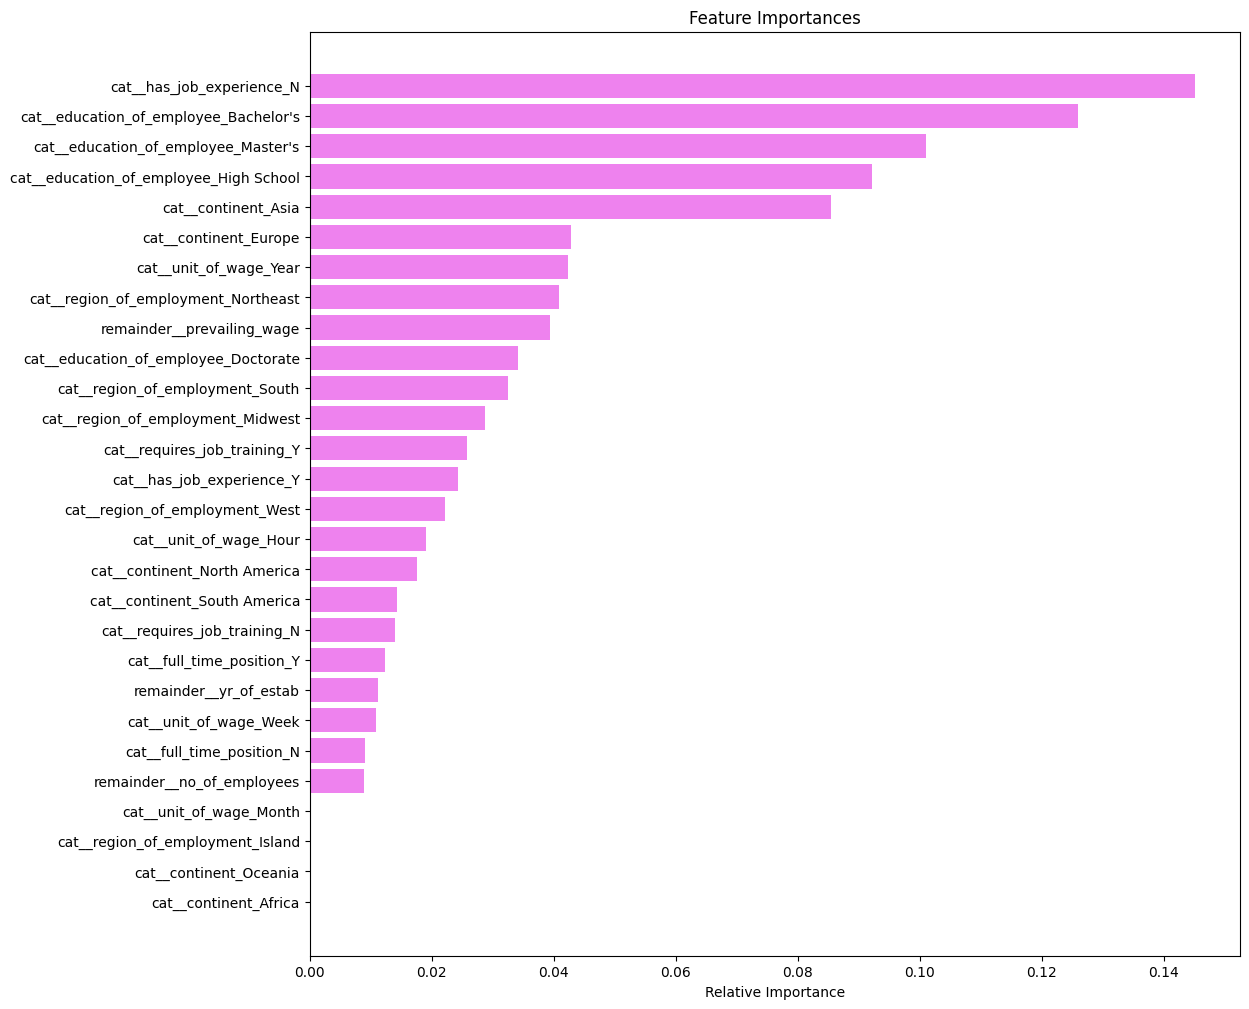

In [245]:
# Get feature names after preprocessing
# Use get_feature_names_out() from the fitted preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

importances = final_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

Based on the analysis and the feature importances from the final XGBoost model, here are some actionable insights and recommendations:

**Actionable Insights:**

**Experience is Key:** Having prior job experience is a strong positive indicator for visa certification.

**Education Matters:** Applicants with higher education levels (Master's and Doctorate degrees) have significantly higher visa certification rates.

**Continent of Origin:** Applicants from Ashia and Europe show higher certification rates compared to other continents.

**Wage Unit:** The unit of prevailing wage has a notable impact, with 'Year' being associated with the highest certification rates and 'Hour' with the lowest.

**Region of Employment:** While the median prevailing wage is similar across most US regions, the Northeast and South have the highest volume of applications.

**Prevailing Wage:** A slightly higher median prevailing wage is observed for certified cases, although it is not the sole determinant. It's important to note that the prevailing wage data is unbalanced, with some values in yearly and others in hourly units, which are not on the same scale. Therefore, this factor needs further analysis in collaboration with the business to bring it to a consistent level.

**Top Influencing Factors (from XGBoost Model):** The feature importance plot indicates that education_of_employee, and region_of_employment , continent,  yr_of_estab, and no_of_employees are among the most important numerical features for the model's predictions.

**Recommendations:**

**Prioritize Applications:** The OFLC can consider prioritizing applications from candidates with higher education levels and job experience, as these have a higher likelihood of being certified.

**Focus on High-Impact Features:** During manual review or further analysis, pay close attention to the features identified as most important by the model (education_of_employee, region_of_employment, continent, prevailing_wage, yr_of_estab, no_of_employees) as they are strong indicators of the case status.

**Investigate Wage Unit Discrepancies:** Further investigation into why applications with hourly wages have a significantly lower certification rate is recommended. There might be underlying reasons related to job types, application requirements, or review processes that need to be addressed.

**Review Outlier Cases:** The presence of outliers in no_of_employees, yr_of_estab, and prevailing_wage suggests that these cases might warrant individual review to understand the factors contributing to their status.

**Consider Targeted Training:** For applicants who require job training, providing resources or guidance on how this might impact their application and what types of training are viewed favorably could be beneficial.

**Regular Model Monitoring:** Continuously monitor the model's performance on new data and retrain it periodically to ensure its accuracy and relevance as immigration policies or labor market conditions change.

By leveraging these insights and recommendations, OFLC and EasyVisa can work towards a more efficient and data-driven visa certification process, benefiting both employers and qualified foreign workers.

In [246]:
!jupyter nbconvert Final_AdvancedAIML_EasyVisa_Full_Code_Notebook.ipynb --to html

[NbConvertApp] Converting notebook Final_AdvancedAIML_EasyVisa_Full_Code_Notebook.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('metadata' was unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][131]['outputs'][0]:
{'metadata': {'tags': None},
 'name': 'stdout',
 'output_type': 'stream',
 'text': 'Best parameters are \n'
         "{'subsample': 1.0, 'n_estimators': 100, 'ma..."}
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 2088740 bytes to Final_AdvancedAIML_EasyVisa_Full_Code_Notebook.html


<font size=6 color='blue'>Power Ahead</font>